In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the diabetes dataset
df = pd.read_csv('diabetes.csv')


In [162]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [164]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\sujith\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Figure size 1000x600 with 0 Axes>

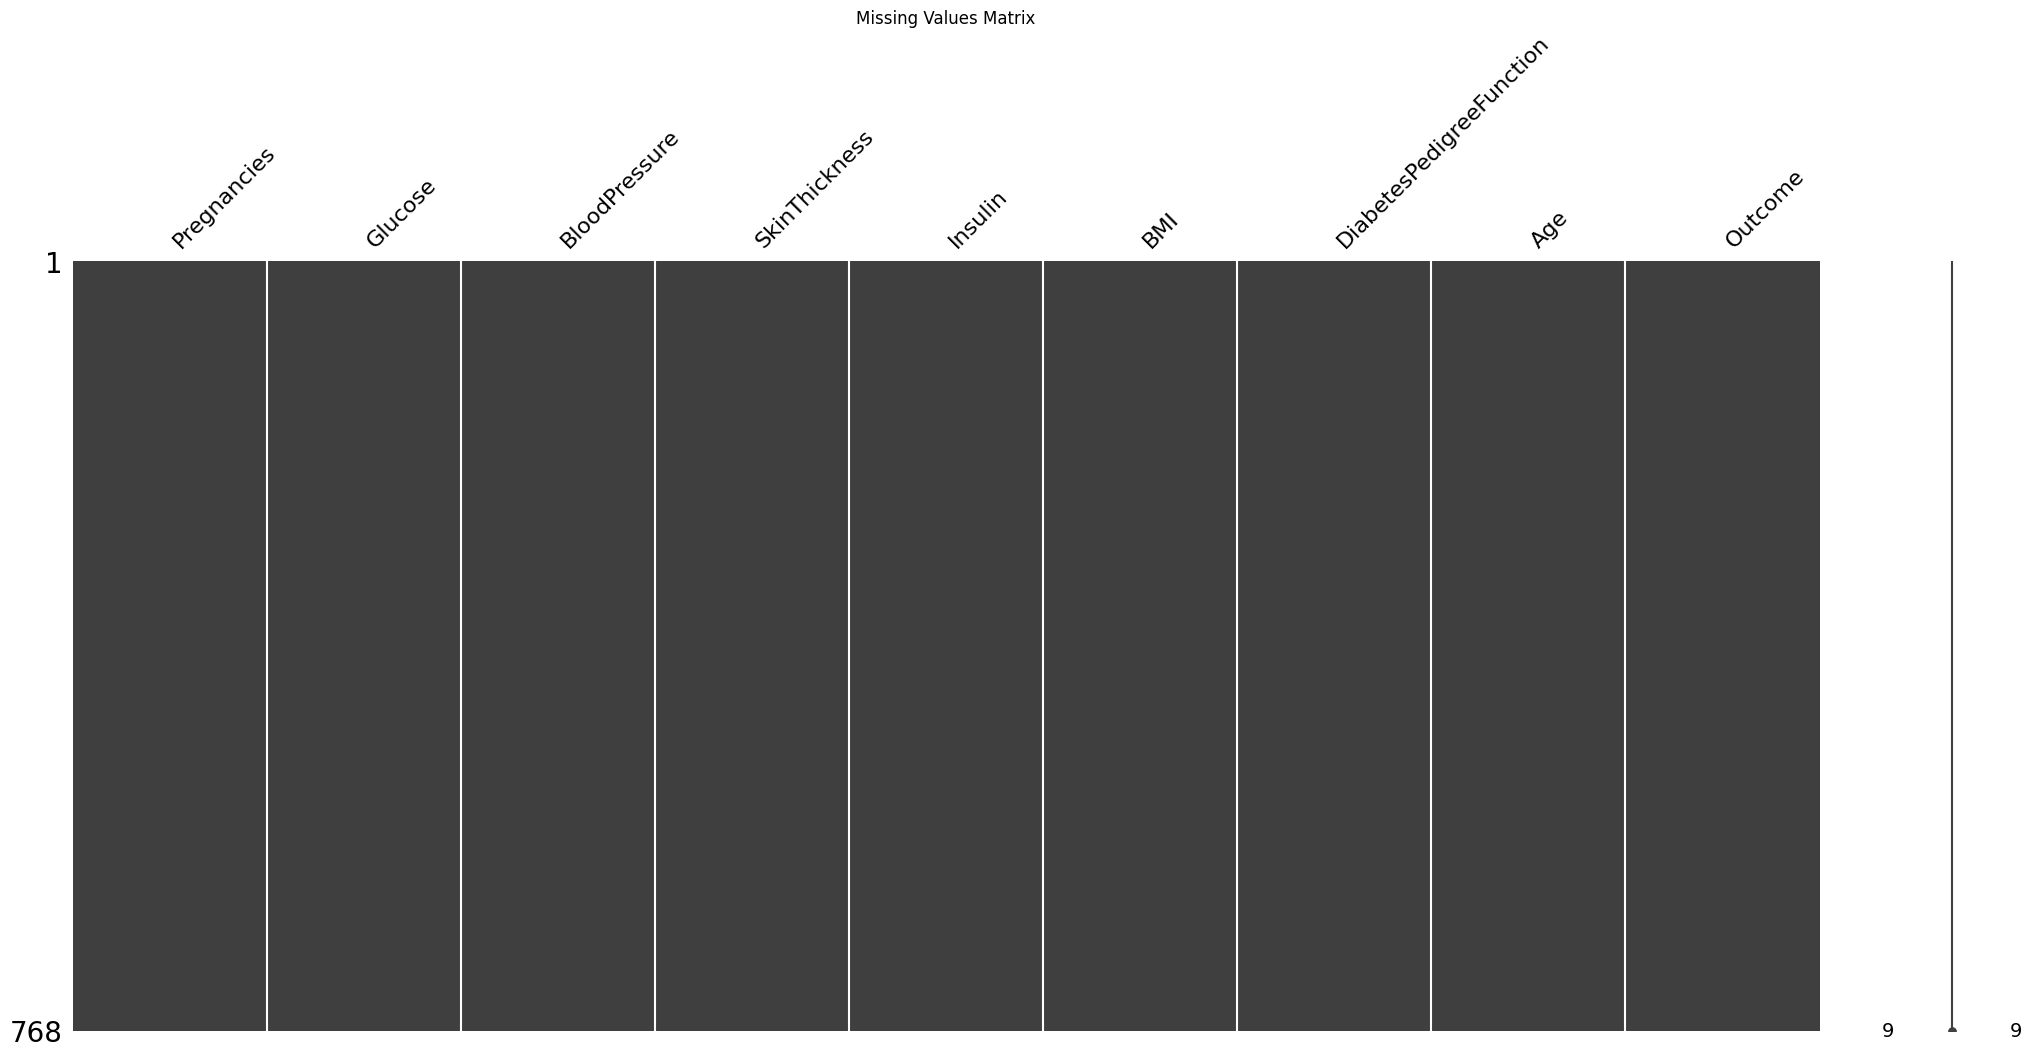

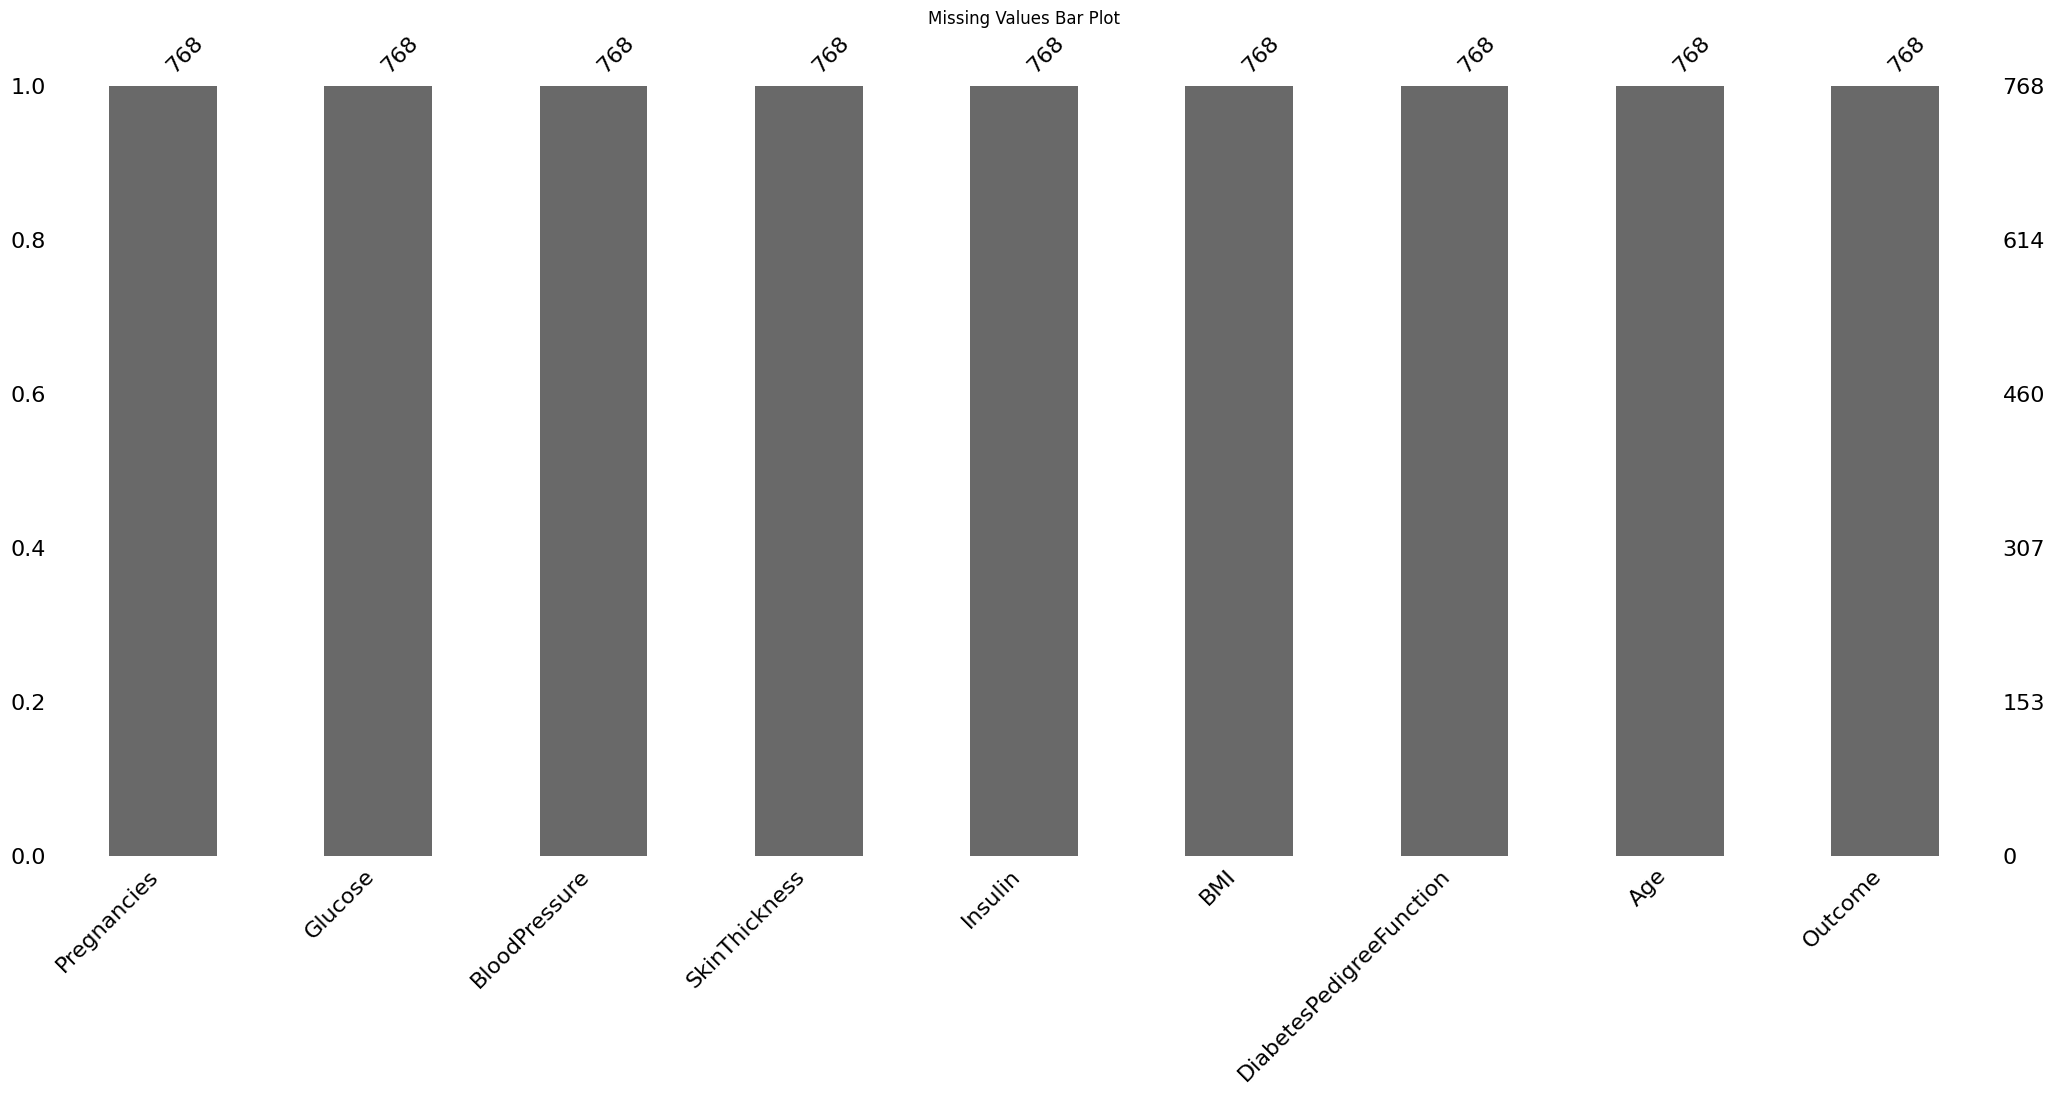

<Figure size 1000x600 with 0 Axes>

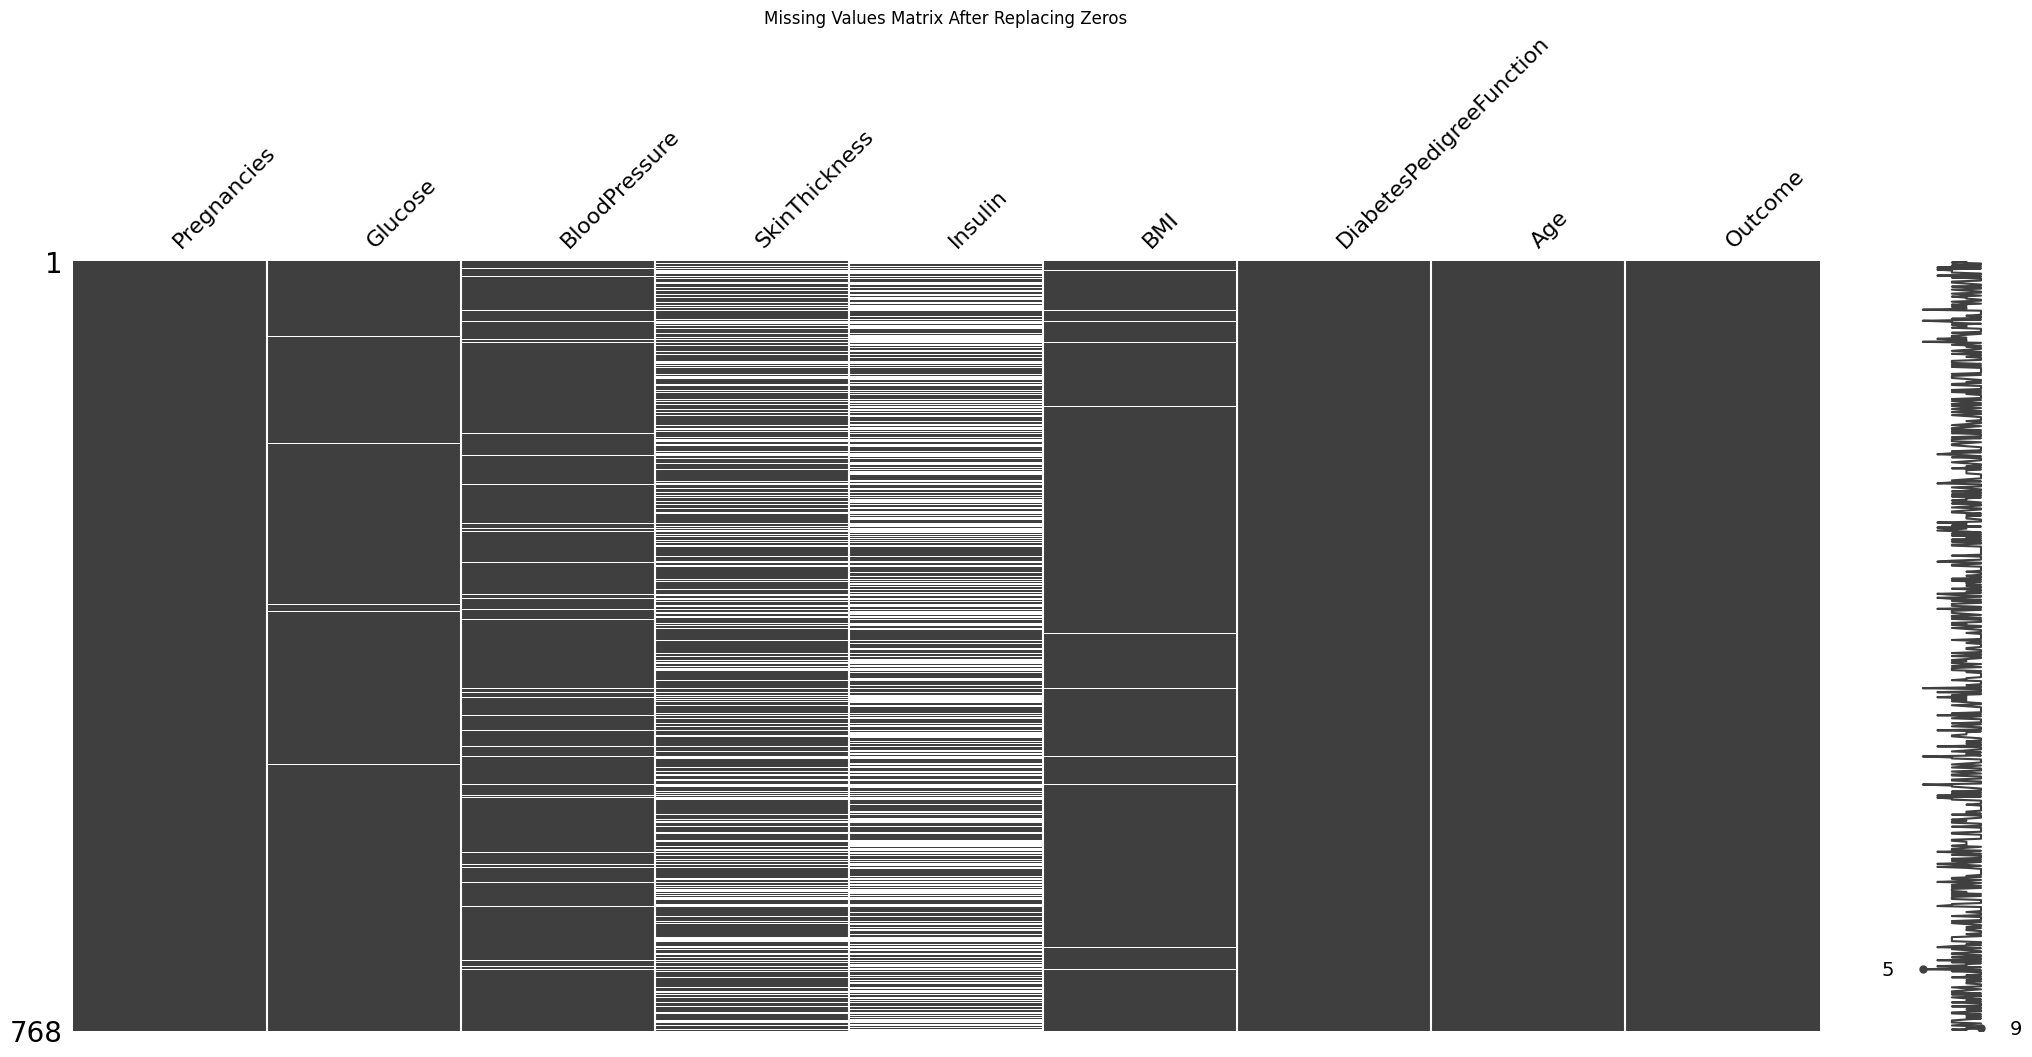

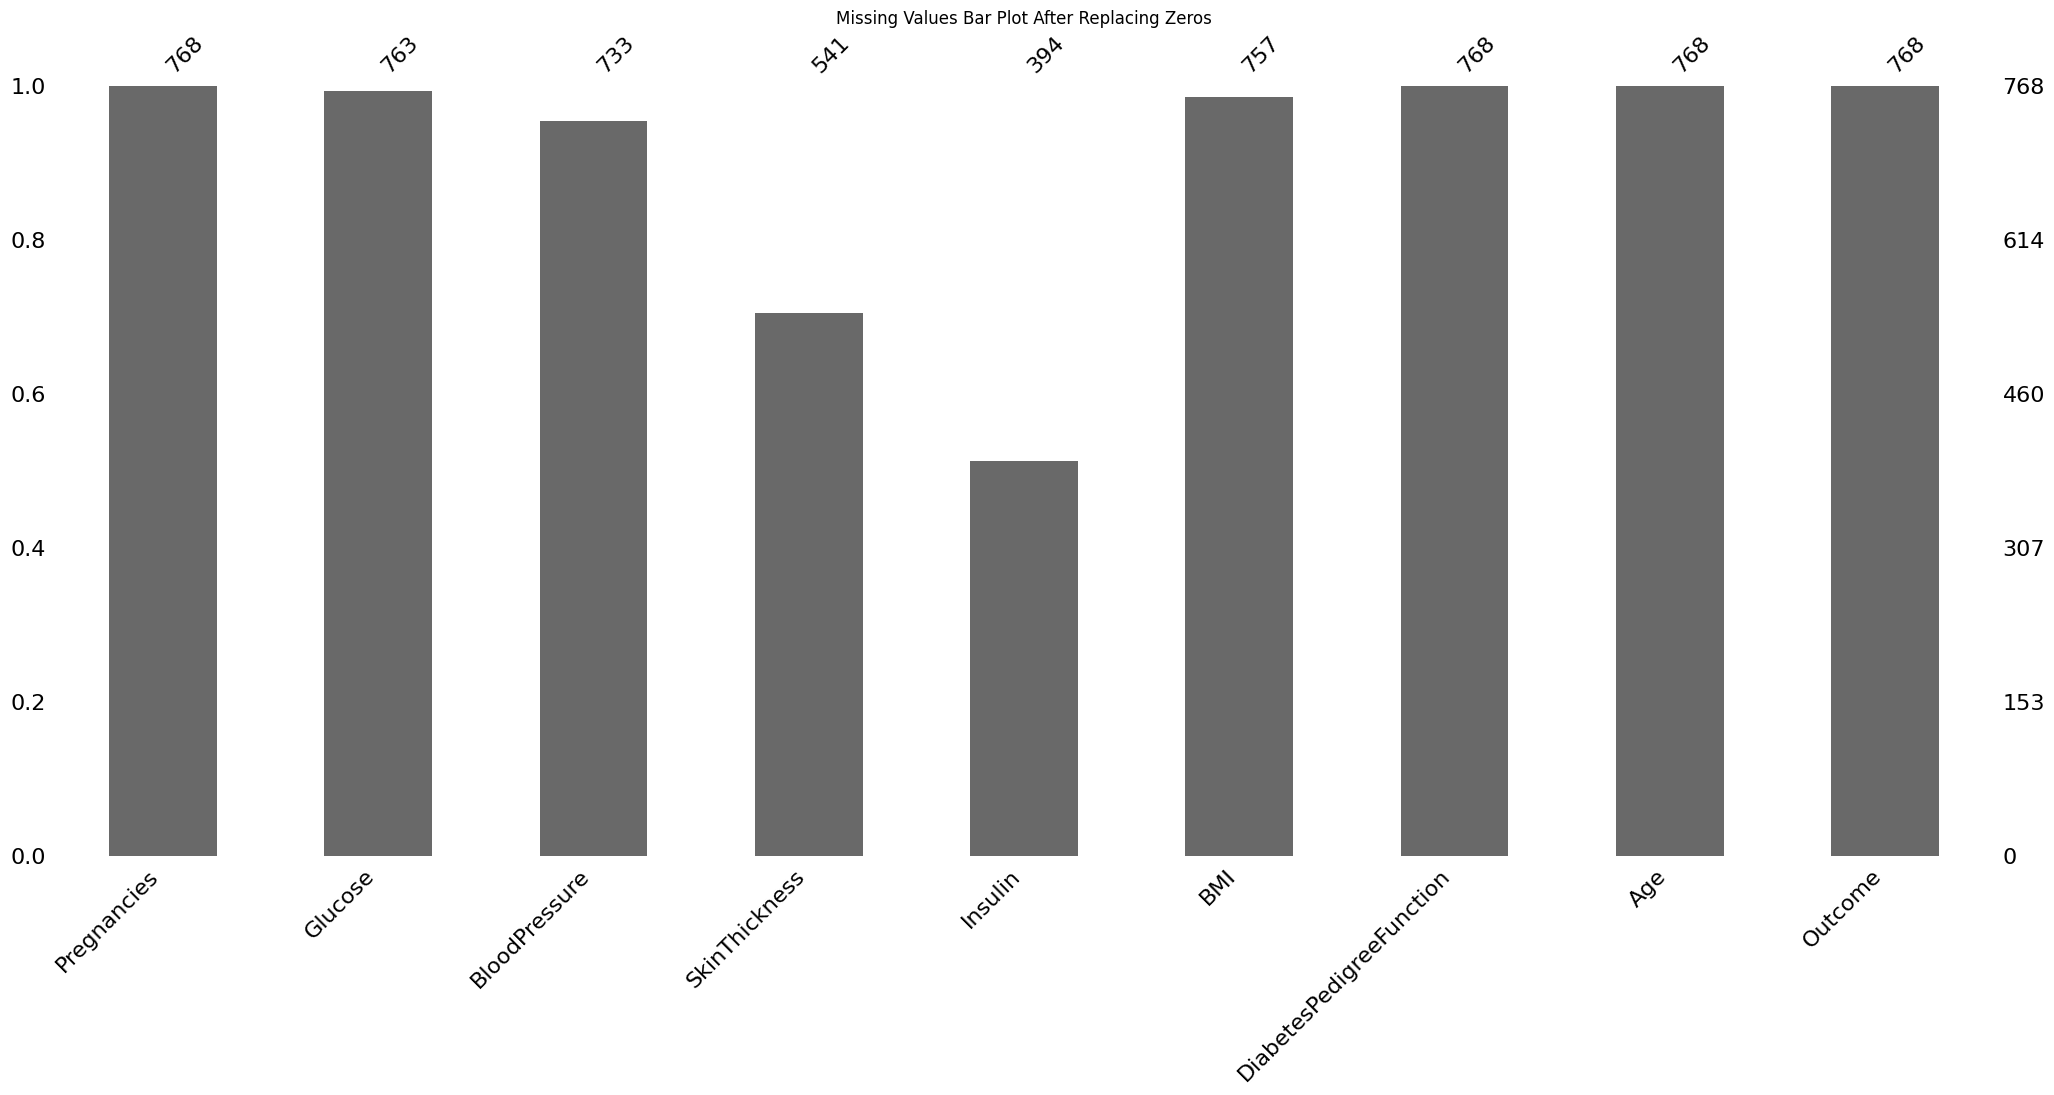


Missing values in each column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [165]:
# Install missingno package if not already installed
!pip install missingno

# Import missingno
import missingno as msno

# Create a matrix plot to visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

# Create a bar plot to show missing values in each column
plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title('Missing Values Bar Plot')
plt.show()

# Replace zeros with NaN for columns where 0 is not a valid value
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_check] = df[columns_to_check].replace(0, np.nan)

# Show the updated missing values matrix
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Values Matrix After Replacing Zeros')
plt.show()

# Show the updated bar plot
plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title('Missing Values Bar Plot After Replacing Zeros')
plt.show()

# Print the count of missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


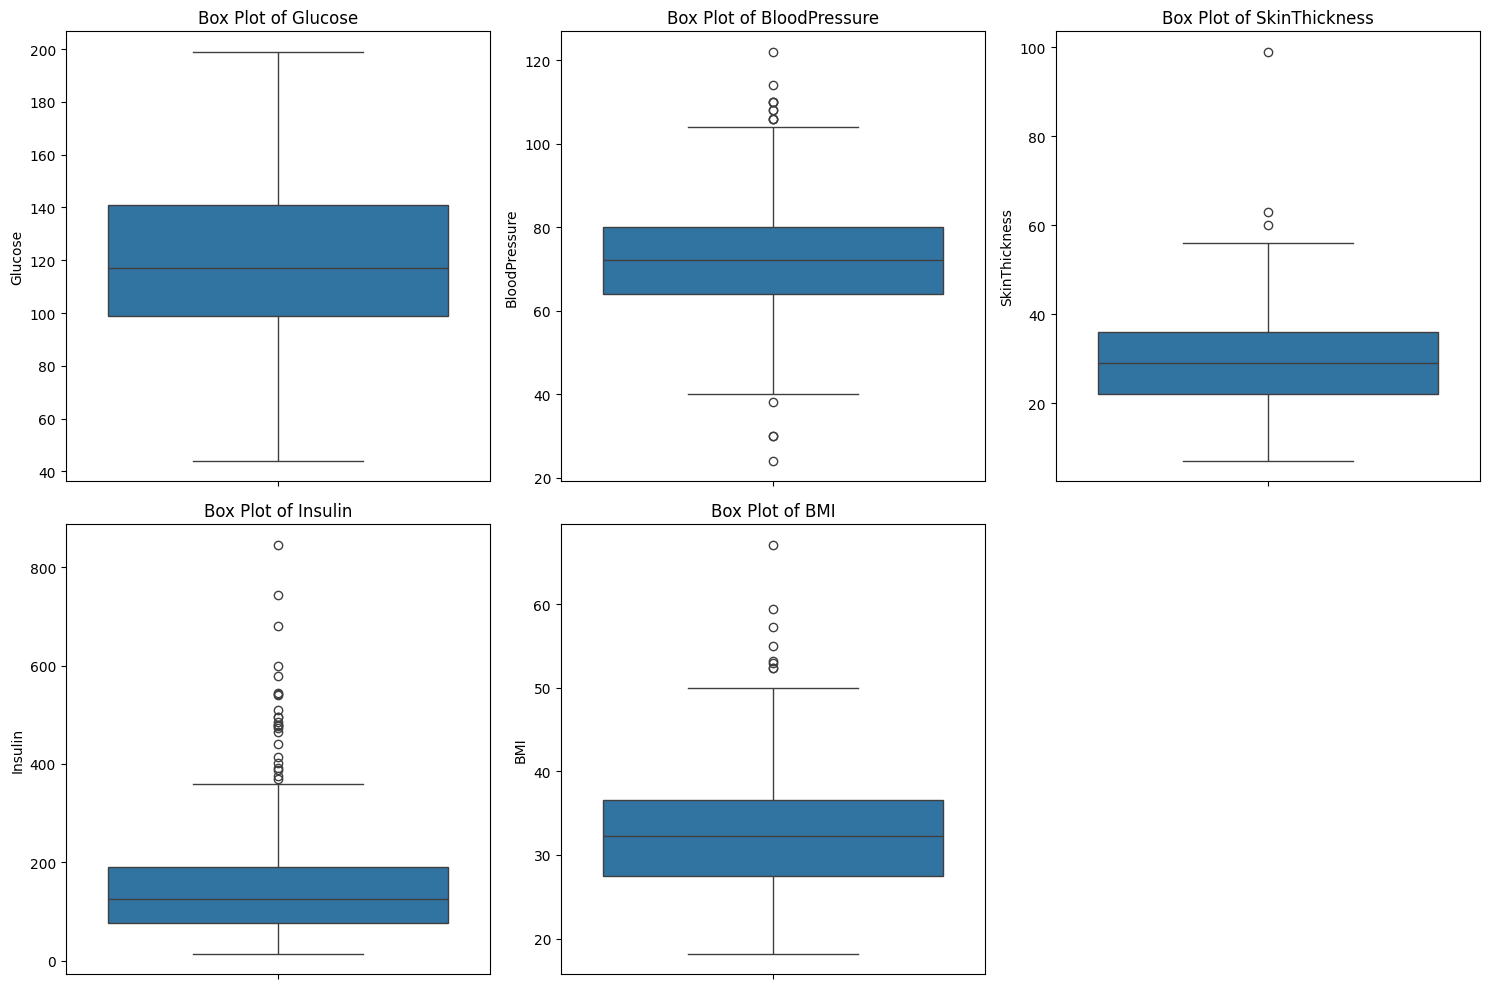


Summary statistics for columns with missing values:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  763.000000     733.000000     541.000000  394.000000  757.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.535641      12.382158      10.476982  118.775855    6.924988
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.000000      64.000000      22.000000   76.250000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    141.000000      80.000000      36.000000  190.000000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [166]:
# Create box plots for columns with missing values
plt.figure(figsize=(15, 10))

# Create subplots for each column
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Print summary statistics for these columns
print("\nSummary statistics for columns with missing values:")
print(df[columns_to_check].describe())


In [167]:
# Replace missing values in Glucose with mean

# Create a dictionary of masks for each column
mask = {}
for column in columns_to_check:
    mask[column] = df[column].isnull()
glucose_mean = df['Glucose'].mean()
df['Glucose'] = df['Glucose'].fillna(glucose_mean)

# Replace missing values in other columns with median
for column in ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

# Verify the imputation by checking for any remaining missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())
df_after=df



Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [168]:
# Create X (features) by excluding 'Outcome' and columns with missing values
X = df.drop(['Outcome', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], axis=1)

# Create y (target variable)
y = df['Outcome']
# Create a list of dropped columns
dropped_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create a dictionary to store each column
column_data = {}

# Store each column in the dictionary using a for loop
for column in dropped_columns:
    column_data[column] = df[column]

# Display the shapes and first few rows of each column using a for loop
print("\nShapes and first few rows of each column:")
for column in dropped_columns:
    print(f"\n{column}:")
    print(f"Shape: {column_data[column].shape}")
    print("First few rows:")
    print(column_data[column].head())


# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display the first few rows of X
print("\nFirst few rows of X:")
print(X.head())



Shapes and first few rows of each column:

Glucose:
Shape: (768,)
First few rows:
0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: Glucose, dtype: float64

BloodPressure:
Shape: (768,)
First few rows:
0    72.0
1    66.0
2    64.0
3    66.0
4    40.0
Name: BloodPressure, dtype: float64

SkinThickness:
Shape: (768,)
First few rows:
0    35.0
1    29.0
2    29.0
3    23.0
4    35.0
Name: SkinThickness, dtype: float64

Insulin:
Shape: (768,)
First few rows:
0    125.0
1    125.0
2    125.0
3     94.0
4    168.0
Name: Insulin, dtype: float64

BMI:
Shape: (768,)
First few rows:
0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64
Shape of X: (768, 3)
Shape of y: (768,)

First few rows of X:
   Pregnancies  DiabetesPedigreeFunction  Age
0            6                     0.627   50
1            1                     0.351   31
2            8                     0.672   32
3            1                     0.167   21
4            0                     2.28

In [169]:
model = LinearRegression()


for column in dropped_columns:
        # Fit the model
        model.fit(X, column_data[column])
         # Make figure very small
    
    
        predictions = model.predict(X)
        observed_rows = ~mask[column]
        
        standard_deviation = (df.loc[observed_rows, column]-predictions[observed_rows]).std()
        
        
    
    # Update only the rows that were previously null
   
        df.loc[mask[column], column] = predictions[mask[column]]+np.random.normal(0, standard_deviation,len(df.loc[mask[column], column]))
   



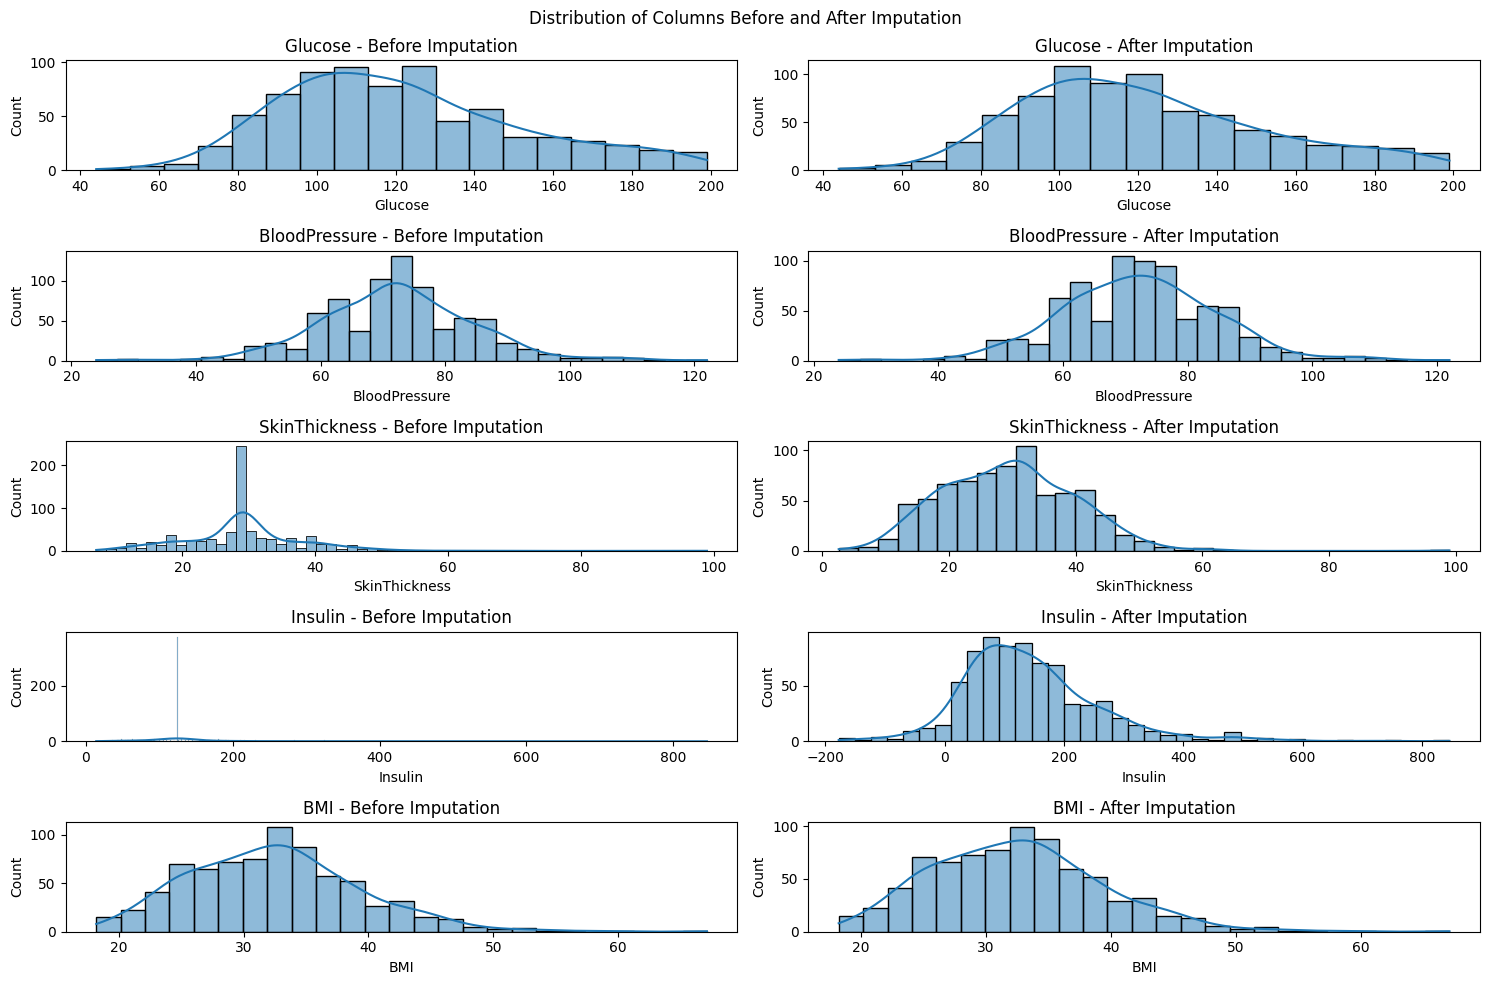

In [170]:
# Create a figure with 5 subplots for each column
fig, axes = plt.subplots(5, 2, figsize=(15, 10))
fig.suptitle('Distribution of Columns Before and After Imputation')

# Plot distributions for each column
for i, column in enumerate(dropped_columns):
    # Before imputation
    sns.histplot(data=df_original[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{column} - Before Imputation')
    
    # After imputation
    sns.histplot(data=df[column], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'{column} - After Imputation')

plt.tight_layout()
plt.show()
